In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))

In [2]:
from fdi_flow.state_observers.kalman import KalmanFilter
from fdi_flow.state_observers.luenberger import LuenbergerObserver
from fdi_flow.state_observers.sliding_mode import SlidingModeObserver

In [3]:
# Initial matrices

A = np.array([[-2, 1],
            [1, -1]])

B = np.array([[-1],
            [1]])

C = np.array([[1, 0]])

dt = 0.1 # Time step

In [4]:
# Initial state

x0 = np.array([[2], [3]]) 

## Luenberger observer

In [5]:
# Create Luenberger observer

observer = LuenbergerObserver(A, B, C, dt, x0)

In [6]:
# Initial measured input
y = np.array([[0]])

# Initial control input
input_signal = 0                           

result = []
system_x1 = []
system_x2 = []
out_input = []
t = []
syst = np.array(x0, dtype=float)

In [7]:
# Simulation loop

for i in range(200):
    t.append(i * dt)
    input_signal = input_signal + 10*(math.sin(2*math.pi*i*dt))*dt
    out_input.append(input_signal)
    u = np.array(input_signal).reshape((-1, 1))
    x_est = observer.update(u, y)
    result.append(x_est.flatten())   
    syst = syst + (A @ syst + B @ u) * dt
    y = C @ syst
    system_x1.append(syst[0])
    system_x2.append(syst[1])

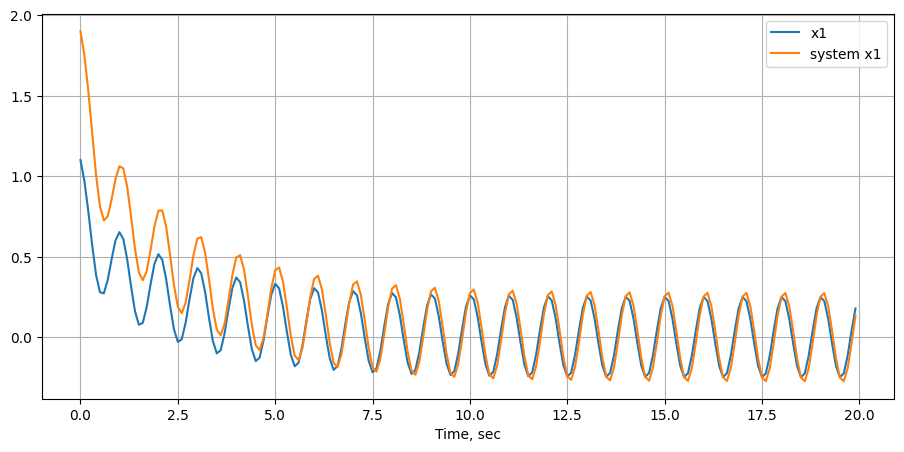

In [8]:
result_x1 = [arr[0] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(t, result_x1, label="x1")
plt.plot(t, system_x1, label="system x1")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();

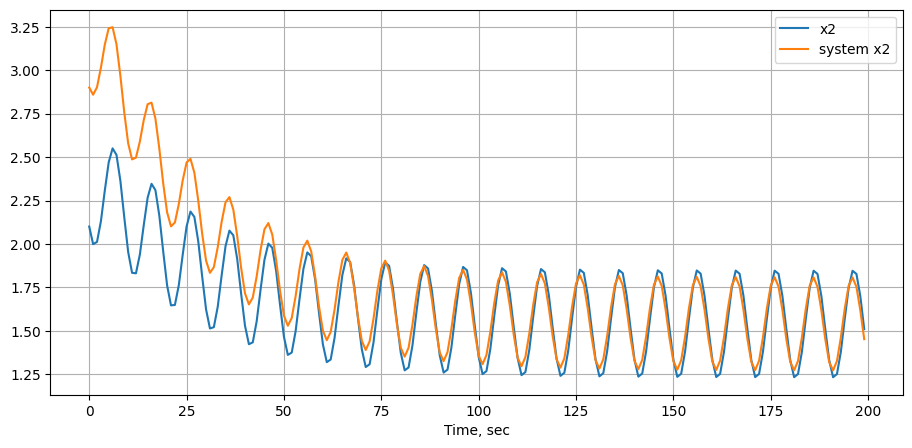

In [9]:
result_x2 = [arr[1] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(result_x2, label="x2")
plt.plot(system_x2, label="system x2")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();

## Kalman filter

In [10]:
F = np.array([[-0.2, 0.1],   # Fundamental matrix changed for stability
             [0.1, -0.1]]) 

B = np.array([[0.5], 
              [0.2]])  # Control input matrix changed for stability

H = np.array([[1, 0]])

In [11]:
Q = np.eye(2) * 0.01  # Process noise covariance
R = np.array([[0.1]])  # Measurement noise covariance
P0 = np.eye(2)  # Initial error covariance

In [12]:
# Create the Kalman filter object
kf = KalmanFilter(F, B, H, Q, R, x0, P0)

In [13]:
y = np.array([[1.5]])          
input_signal = 0                   

result = []
resultP = []
system_x1 = []
system_x2 = []
out_input = []
t = np.arange(0, 200*dt, dt)
syst = np.array(x0, dtype=float)

In [14]:
for i in range(200):
    input_signal = input_signal + 10*(math.sin(2*math.pi*i*dt))*dt
    out_input.append(input_signal)
    
    u = np.array(input_signal).reshape((-1, 1))
    x_est, P_est = kf.step(y, u)
    result.append(x_est.flatten()) 
    syst = F @ syst + B @ u
    syst += np.random.normal(0, 0.3, size=(2,1))
    y = H @ syst + np.random.normal(0, 0.7)
    system_x1.append(syst[0])
    system_x2.append(syst[1])


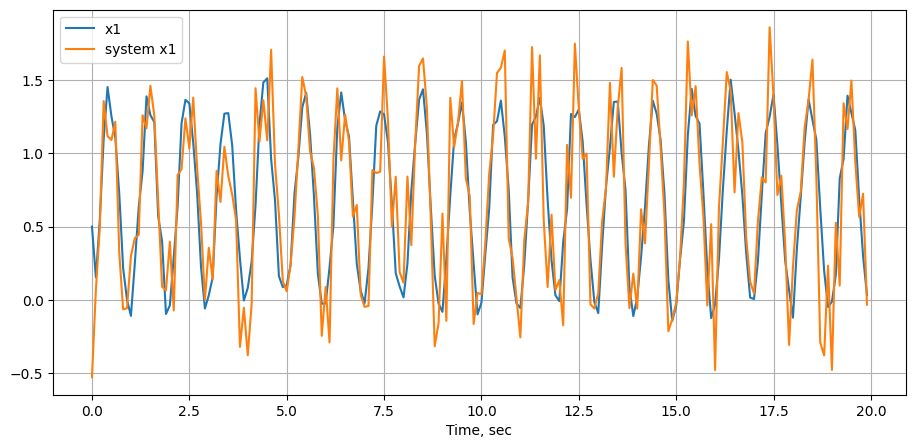

In [15]:
result_x1 = [arr[0] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(t, result_x1, label="x1")
plt.plot(t, system_x1, label="system x1")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();

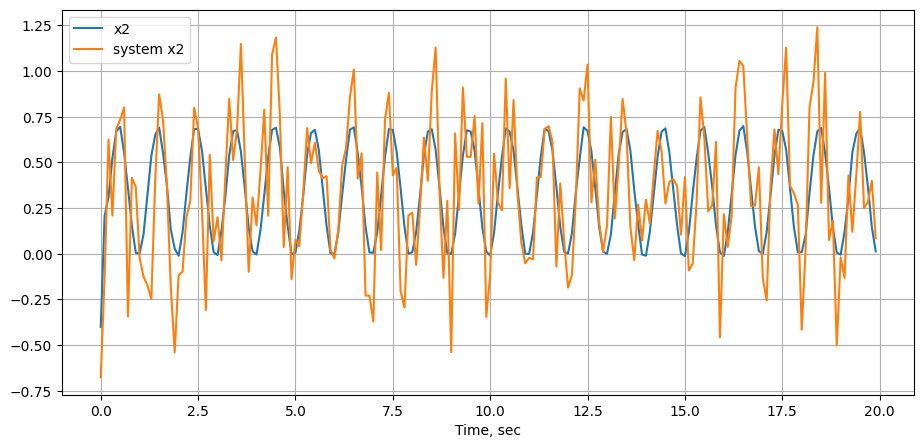

In [16]:
result_x2 = [arr[1] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(t, result_x2, label="x2")
plt.plot(t, system_x2, label="system x2")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();

## Sliding mode observer

In [17]:
# Initial matrices

A = np.array([[-2, 1],
            [1, -1]])

B = np.array([[-1],
            [1]])

C = np.array([[1, 0]])

dt = 0.1 # Time step

In [18]:
# Initial state

x0 = np.array([[2], [3]]) 

In [19]:
# Initial observer state
observer = SlidingModeObserver(A=A, B=B, C=C, desired_poles=None, eta=1.0, eps=0.1)

In [20]:
# Initial measured input
y = np.array([[0]])

# Initial control input
input_signal = 0                           

result = []
system_x1 = []
system_x2 = []
out_input = []
t = []
syst = np.array(x0, dtype=float)

In [21]:
# Simulation loop

for i in range(200):
    t.append(i * dt)
    input_signal = input_signal + 10*(math.sin(2*math.pi*i*dt))*dt
    out_input.append(input_signal)
    u = np.array(input_signal).reshape((-1, 1))
    x_est = observer.step(syst, y, dt, u)
    result.append(x_est.flatten())   
    process_noise = np.random.multivariate_normal([0,0], np.eye(2)*0.1).reshape(2,1)
    system_x1.append(syst[0])
    system_x2.append(syst[1])
    syst = syst + (A @ syst + B @ u + process_noise) * dt
    y = C @ syst
    

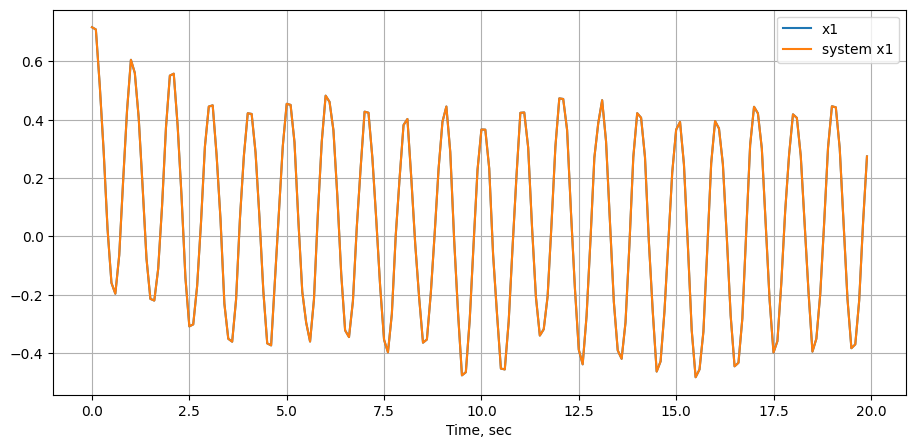

In [22]:
result_x1 = [arr[0] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(t, result_x1, label="x1")
plt.plot(t, system_x1, label="system x1")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();

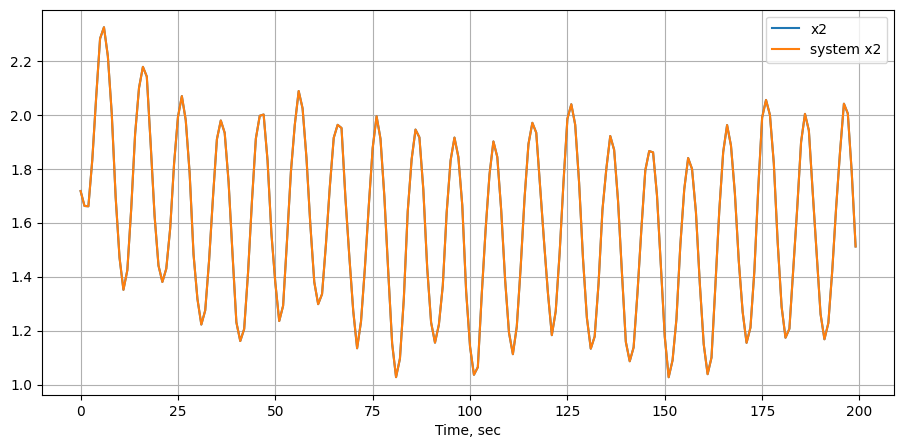

In [23]:
result_x2 = [arr[1] for arr in result]
plt.figure(figsize=(11, 5))
plt.plot(result_x2, label="x2")
plt.plot(system_x2, label="system x2")
plt.legend()
plt.grid()
plt.xlabel("Time, sec")
plt.show();